In [1]:
from ucimlrepo import fetch_ucirepo 
from collections import defaultdict

wine_quality = fetch_ucirepo(id=186)

In [2]:
X = wine_quality.data.features 
y_raw = wine_quality.data.targets 

d = defaultdict(int)
d[6] = 1
d[5] = 2

y = y_raw['quality'].map(d)

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
data = pd.concat([X, y], axis=1)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [16]:
test_split_size = .20
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_split_size)

In [17]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((5197, 11), (5197,), (1300, 11), (1300,))

In [19]:
scaler = StandardScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns=train_X.columns)

In [25]:
class WineDataSet(Dataset):

    def __init__(self, data, targets):

        # import ipdb
        # ipdb.set_trace()
        
        self.X = torch.tensor(data.values)
        self.y = torch.tensor(targets.values)


    def __len__(self):
        return len(self.X)


    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [26]:
train_dataset = WineDataSet(train_X, train_y)
test_dataset = WineDataSet(test_X, test_y)

batch_size = 32
train_dl, test_dl = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
), DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [29]:
l1_neurons = train_X.shape[0]
h1 = 50
h2 = 75


In [ ]:
# Build the neural net, optimizer and loss

class WineNeuralNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(l1_neurons, )

<Axes: >

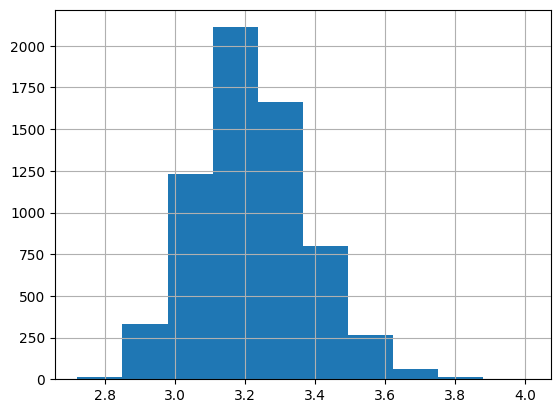

In [9]:
data['pH'].hist()